<a href="https://colab.research.google.com/github/eziong/MachineLearning02/blob/master/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| learning |    θ0    |    θ1    |
|  times   |(0.945482)|(0.910672)|
|----------|----------|----------|
|   0000   | -0.209970 | 4.214953 | # 난수 생성으로 발생한 초기값
|   0001   | -0.209852 | 3.118227 |
|   0002   | -0.209739 | 2.387077 |
|   0003   | -0.209629 | 1.899643 |
|   0004   | -0.209522 | 1.574688 |
|   0005   | -0.209417 | 1.358051 |
|   0006   | -0.209313 | 1.213626 |
|   0007   | -0.209209 | 1.117343 |
|   0008   | -0.209106 | 1.053154 |
|   0009   | -0.209003 | 1.010362 |
|   0010   | -0.208901 | 0.981834 |
|   0011   | -0.208799 | 0.962815 |
|   0012   | -0.208697 | 0.950136 |
|   0013   | -0.208594 | 0.941683 |


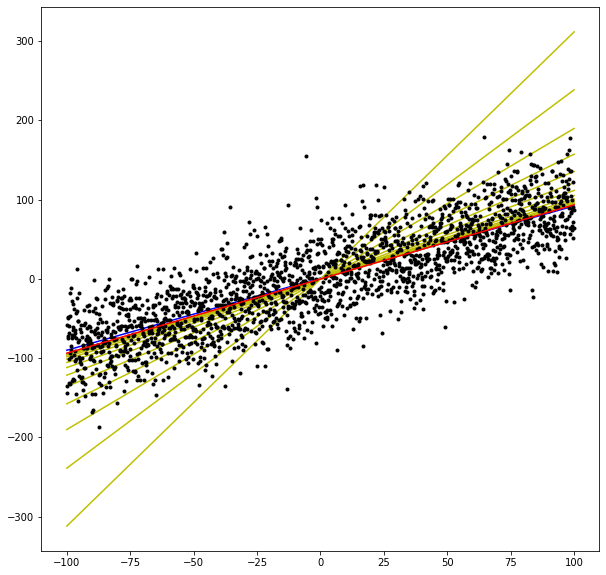

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# (x,y) 데이터 생성
x_data = np.arange(-100,100,0.1) # -100부터 100까지 0.1 간격의 x값
a = np.random.rand() # linear function의 theta1
b = np.random.rand() # linear function의 theta0
y_data = a*x_data+np.random.normal(0.0,36,len(x_data)) + b # y = ax + b 형태의 직선

learning_rate = 1e-4 # 학습률

errors0 = [] # 경사하강법에서 기울기 변화율에 비례하는 값을 저장
errors1 = [] # while문(learning loop) 종료조건으로 활용
             # 최근 두 개의 errors값을 비교 후 종료

theta0=np.random.normal(0.0,4.0) # m = 0, sig = 2의 정규분포를 따르는 난수 조건 //theta0 생성
theta1=np.random.normal(0.0,4.0) # m = 0, sig = 2의 정규분포를 따르는 난수 조건 //theta1 생성

#출력 포맷 작성
print("| learning |    θ0    |    θ1    |")
print("|  times   |(%f)|(%f)|"%(b,a))
print("|----------|----------|----------|")
print("|   %.4d   | %f | %f | # 난수 생성으로 발생한 초기값"%(len(errors0),theta0,theta1))


x=np.array([-100,100]) # [-100,100] 범위의 그래프 생성

plt.figure(figsize=(10,10)) # plt.show()의 크기를 변경
plt.plot(x,a*x+b,'b') # linear function ,파란색

# Learning loop
while True:
  tmp0=0 # theta0의 값에 직접 저장하기 전에 임시 저장, 목적함수의 미분값
  tmp1=0 # theta1의 값에 직접 저장하기 전에 임시 저장, 목적함수의 미분값

  # 경사하강법 Loop, 목적함수의 미분값 계산 
  for i in range(len(x_data)):
    tmp0+=learning_rate*(theta0+theta1*x_data[i]-y_data[i])/len(x_data)
    tmp1+=learning_rate*x_data[i]*(theta0+theta1*x_data[i]-y_data[i])/len(x_data)

  # 계산된 목적함수의 미분값을 theta0과 theta1에 대입
  theta0-=tmp0
  theta1-=tmp1
  # errors 리스트에 tmp에 해당하는 값을 append
  errors0.append(tmp0)
  errors1.append(tmp1)
  latest = len(errors0) - 1

  # 최근 두 개의 errors0 또는 errors1의 값이 반올림해서 같으면 충분히 학습된 것으로 판단 => Loop 종료
  if(latest>2 and ((round(errors0[latest],7)==round(errors0[latest-1],7))or(round(errors1[latest],7)==round(errors1[latest-1],7)))):
    break;
  # Loop가 진행중이라면 현재 learning 횟수와 각각의 theta 값을 출력, 해당 값의 직선(plt.show())
  else:
    y = theta0 + theta1 * x
    plt.plot(x,y,'y')
    print("|   %.4d   | %f | %f |"%(len(errors0),theta0,theta1))

# Learning Loop를 끝내고 나온 결과
y = theta0 +theta1*x

# 그래프 생성
plt.plot(x_data,y_data,'k.')
plt.plot(x,y,'r')
plt.show()